In [134]:
# This Data Contains Crime and Safety data from the Cary Police Department. It contains crimes of arson, motor vehicle thefts, larcenies, burglaries, aggravted assaults, robberies and homicedes.
# I will try by best to clean the data to only show crimes of Aggravated Assault and do my best to map it.  
import pandas as pd
import geopandas as gpd

In [137]:
cpd=gpd.read_file('data/cpd-incidents.zip')

In [139]:
# what type of data?
type(cpd)

geopandas.geodataframe.GeoDataFrame

In [141]:
# What does the data look like ?
cpd.head()

crime_categ          crime_type  ucr map_referen incident_nu  \
0  AGGRAVATED ASSAULT  AGGRAVATED ASSAULT  13A        P024    09005086   
1  AGGRAVATED ASSAULT  AGGRAVATED ASSAULT  13A        P024    10004215   
2  AGGRAVATED ASSAULT  AGGRAVATED ASSAULT  13A        P080    02003704   
3  AGGRAVATED ASSAULT  AGGRAVATED ASSAULT  13A        P003    07006468   
4  AGGRAVATED ASSAULT  AGGRAVATED ASSAULT  13A        P027    03004305   

    date_from from_time     date_to   to_time   crimeday  ... phxcommunit  \
0  2009-10-11  15:50:00  2009-10-11  15:55:00     SUNDAY  ...         Yes   
1  2010-08-03  18:30:00  2010-08-03  19:00:00    TUESDAY  ...          No   
2  2002-08-25  17:15:00  2002-08-25  18:30:00     SUNDAY  ...         Yes   
3  2007-12-14  13:17:00  2007-12-14  13:27:00     FRIDAY  ...          No   
4  2003-08-27  10:39:00  2003-08-27  10:43:00  WEDNESDAY  ...          No   

  phxstatus record         offensecate violentprop     timeframe  domestic  \
0    Active     36  Aggravated Assault      Part I  Out of Range         N   
1      None     37  Aggravated Assault      Part I  Out of Range         N   
2    Active     54  Aggravated Assault      Part I  Out of Range         N   
3      None     69  Aggravated Assault      Part I  Out of Range         N   
4      None     77  Aggravated Assault      Part I  Out of Range         N   

  total_incid  year                    geometry  
0           1  2009  POINT (-78.78775 35.80567)  
1           1  2010  POINT (-78.78404 35.80485)  
2           1  2002  POINT (-78.77999 35.81942)  
3           1  2007  POINT (-78.75274 35.77340)  
4           1  2003  POINT (-78.78215 35.76714)  

[5 rows x 34 columns]

In [149]:
# wow this is a huge dataset 
cpd.tail(4)

crime_categ                                         crime_type  ucr  \
49996   ALL OTHER  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...  90Z   
49997   ALL OTHER  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...  90Z   
49998   ALL OTHER  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...  90Z   
49999   ALL OTHER  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...  90Z   

      map_referen incident_nu   date_from from_time     date_to   to_time  \
49996        P031    14003710  2014-05-10  03:00:53  2014-05-10  03:14:00   
49997        P031    17001734  2017-02-27  16:39:26  2017-02-27  16:39:26   
49998        P032    12004523  2012-05-22  12:00:00  2012-05-23  20:00:00   
49999        P032    12005267  2012-06-14  20:42:00  2012-06-14  20:42:00   

        crimeday  ... phxcommunit phxstatus record         offensecate  \
49996   SATURDAY  ...         Yes    Active   5468  All Other Offenses   
49997     MONDAY  ...          No      None   5473  All Other Offenses   
49998  WEDNESDAY  ...          No      None   5484  All Other Offenses   
49999   THURSDAY  ...          No      None   5485  All Other Offenses   

      violentprop     timeframe  domestic total_incid  year  \
49996   All Other  Out of Range         Y           1  2014   
49997   All Other  Out of Range         Y           1  2017   
49998   All Other  Out of Range         N           1  2012   
49999   All Other  Out of Range         N           1  2012   

                         geometry  
49996  POINT (-78.77110 35.80239)  
49997  POINT (-78.77293 35.79742)  
49998  POINT (-78.78232 35.79464)  
49999  POINT (-78.78030 35.79191)  

[4 rows x 34 columns]

In [147]:
# Will def need to clean this 
cpd.dtypes

crime_categ      object
crime_type       object
ucr              object
map_referen      object
incident_nu      object
date_from        object
from_time        object
date_to          object
to_time          object
crimeday         object
geocode          object
location_ca      object
district         object
beat_number      object
id               object
lat             float64
lon             float64
chrgcnt          object
neighborhd_      object
apartment_c      object
residential      object
subdivisn_i      object
activity_da      object
phxrecordst      object
phxcommunit      object
phxstatus        object
record           object
offensecate      object
violentprop      object
timeframe        object
domestic         object
total_incid      object
year             object
geometry       geometry
dtype: object

In [150]:
# It has alot of entries 
cpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   crime_categ  50000 non-null  object  
 1   crime_type   50000 non-null  object  
 2   ucr          50000 non-null  object  
 3   map_referen  47207 non-null  object  
 4   incident_nu  50000 non-null  object  
 5   date_from    49997 non-null  object  
 6   from_time    49997 non-null  object  
 7   date_to      49976 non-null  object  
 8   to_time      49976 non-null  object  
 9   crimeday     49976 non-null  object  
 10  geocode      49992 non-null  object  
 11  location_ca  50000 non-null  object  
 12  district     47425 non-null  object  
 13  beat_number  50000 non-null  object  
 14  id           50000 non-null  object  
 15  lat          47294 non-null  float64 
 16  lon          47294 non-null  float64 
 17  chrgcnt      0 non-null      object  
 18  neighborhd_  7254 

In [152]:
# How many rows and columns?
cpd.shape

(50000, 34)

In [153]:
# What are the collumns?
cpd.columns.to_list()

['crime_categ',
 'crime_type',
 'ucr',
 'map_referen',
 'incident_nu',
 'date_from',
 'from_time',
 'date_to',
 'to_time',
 'crimeday',
 'geocode',
 'location_ca',
 'district',
 'beat_number',
 'id',
 'lat',
 'lon',
 'chrgcnt',
 'neighborhd_',
 'apartment_c',
 'residential',
 'subdivisn_i',
 'activity_da',
 'phxrecordst',
 'phxcommunit',
 'phxstatus',
 'record',
 'offensecate',
 'violentprop',
 'timeframe',
 'domestic',
 'total_incid',
 'year',
 'geometry']

In [161]:
cpd['crime_type'].sample(6)

7125         ASSAULT - SIMPLE - ALL OTHER
22060    SEX OFF - ALL OTHER SEX OFFENSES
8497            BURGLARY - FORCIBLE ENTRY
41077                           VANDALISM
34298        LARCENY - FROM MOTOR VEHICLE
1295         ASSAULT - SIMPLE - ALL OTHER
Name: crime_type, dtype: object

In [160]:
cpd['crime_type'].value_counts()

LARCENY - ALL OTHER LARCENY                 4505
LARCENY - FROM MOTOR VEHICLE                4243
LARCENY - SHOPLIFTING                       2980
VANDALISM                                   2650
BURGLARY - FORCIBLE ENTRY                   2346
                                            ... 
FRAUD - FAILURE TO RETURN HIRED PROPERTY       1
FRAUD - LARCENY BY TRICKERY                    1
FRAUD-WORTHLESS CHECK                          1
GAMBLING - BETTING AND WAGERING                1
ALL OTHER - BRIBERY                            1
Name: crime_type, Length: 256, dtype: int64

In [167]:
#save it as a variable
crime_count=cpd['crime_type'].value_counts()
crime_count

LARCENY - ALL OTHER LARCENY                 4505
LARCENY - FROM MOTOR VEHICLE                4243
LARCENY - SHOPLIFTING                       2980
VANDALISM                                   2650
BURGLARY - FORCIBLE ENTRY                   2346
                                            ... 
FRAUD - FAILURE TO RETURN HIRED PROPERTY       1
FRAUD - LARCENY BY TRICKERY                    1
FRAUD-WORTHLESS CHECK                          1
GAMBLING - BETTING AND WAGERING                1
ALL OTHER - BRIBERY                            1
Name: crime_type, Length: 256, dtype: int64

In [164]:
# What type of data type is crime_count?
type(crime_count)

pandas.core.series.Series

In [172]:
# Convert crime_count into data frame
crime_count=crime_count.reset_index()
crime_count

index  crime_type
0                 LARCENY - ALL OTHER LARCENY        4505
1                LARCENY - FROM MOTOR VEHICLE        4243
2                       LARCENY - SHOPLIFTING        2980
3                                   VANDALISM        2650
4                   BURGLARY - FORCIBLE ENTRY        2346
..                                        ...         ...
251  FRAUD - FAILURE TO RETURN HIRED PROPERTY           1
252               FRAUD - LARCENY BY TRICKERY           1
253                     FRAUD-WORTHLESS CHECK           1
254           GAMBLING - BETTING AND WAGERING           1
255                       ALL OTHER - BRIBERY           1

[256 rows x 2 columns]

In [173]:
# double checking if it changed to data frame 
type(crime_count)

pandas.core.frame.DataFrame

In [174]:
# Current columns as a list 
crime_count.columns.to_list()

['index', 'crime_type']

In [187]:
# Rename the columns 
crime_count.columns=['typeofcrime','numberofincidents'] 

In [183]:
crime_count

TypeofCrime  Numberofincidents
0                 LARCENY - ALL OTHER LARCENY               4505
1                LARCENY - FROM MOTOR VEHICLE               4243
2                       LARCENY - SHOPLIFTING               2980
3                                   VANDALISM               2650
4                   BURGLARY - FORCIBLE ENTRY               2346
..                                        ...                ...
251  FRAUD - FAILURE TO RETURN HIRED PROPERTY                  1
252               FRAUD - LARCENY BY TRICKERY                  1
253                     FRAUD-WORTHLESS CHECK                  1
254           GAMBLING - BETTING AND WAGERING                  1
255                       ALL OTHER - BRIBERY                  1

[256 rows x 2 columns]

<AxesSubplot: title={'center': 'number of crimes'}, xlabel='typeofcrime'>

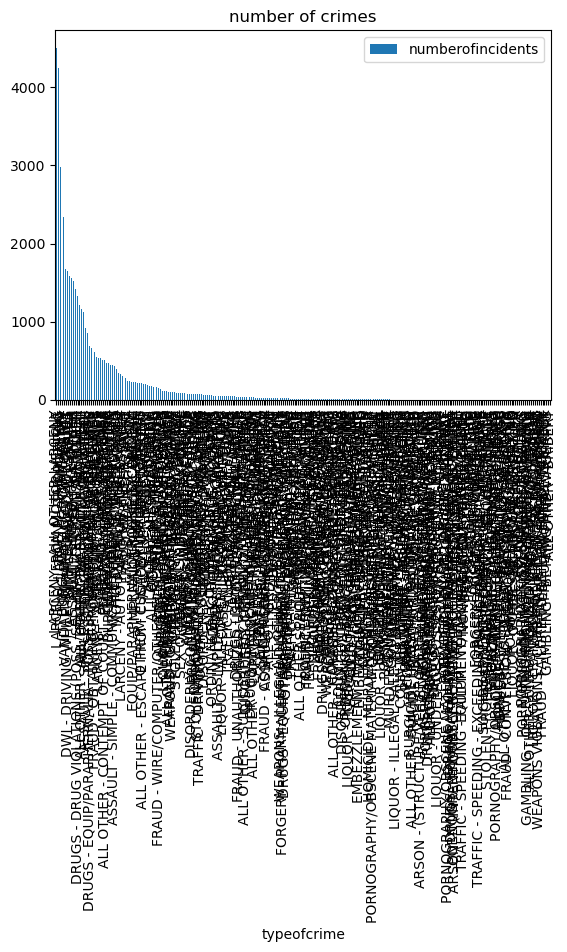

In [196]:
# ouch!!! alot of crimes listed here however i am getting something. I need to think small and work with fewer crimes 
crime_count.plot.bar(x='typeofcrime',y='numberofincidents',title='number of crimes')

In [197]:
cpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   crime_categ  50000 non-null  object  
 1   crime_type   50000 non-null  object  
 2   ucr          50000 non-null  object  
 3   map_referen  47207 non-null  object  
 4   incident_nu  50000 non-null  object  
 5   date_from    49997 non-null  object  
 6   from_time    49997 non-null  object  
 7   date_to      49976 non-null  object  
 8   to_time      49976 non-null  object  
 9   crimeday     49976 non-null  object  
 10  geocode      49992 non-null  object  
 11  location_ca  50000 non-null  object  
 12  district     47425 non-null  object  
 13  beat_number  50000 non-null  object  
 14  id           50000 non-null  object  
 15  lat          47294 non-null  float64 
 16  lon          47294 non-null  float64 
 17  chrgcnt      0 non-null      object  
 18  neighborhd_  7254 

In [198]:
# Trim data
cpd[['crime_type','crimeday','district','lat','lon','geometry']]

crime_type   crimeday district  \
0                                     AGGRAVATED ASSAULT     SUNDAY       D1   
1                                     AGGRAVATED ASSAULT    TUESDAY       D1   
2                                     AGGRAVATED ASSAULT     SUNDAY       D1   
3                                     AGGRAVATED ASSAULT     FRIDAY       D3   
4                                     AGGRAVATED ASSAULT  WEDNESDAY       D3   
...                                                  ...        ...      ...   
49995  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...   SATURDAY       D1   
49996  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...   SATURDAY       D1   
49997  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...     MONDAY       D1   
49998  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...  WEDNESDAY       D1   
49999  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...   THURSDAY       D1   

             lat        lon                    geometry  
0      35.805669 -78.787750  POINT (-78.78775 35.80567)  
1      35.804852 -78.784042  POINT (-78.78404 35.80485)  
2      35.819416 -78.779995  POINT (-78.77999 35.81942)  
3      35.773399 -78.752739  POINT (-78.75274 35.77340)  
4      35.767135 -78.782153  POINT (-78.78215 35.76714)  
...          ...        ...                         ...  
49995  35.802389 -78.771099  POINT (-78.77110 35.80239)  
49996  35.802389 -78.771099  POINT (-78.77110 35.80239)  
49997  35.797422 -78.772933  POINT (-78.77293 35.79742)  
49998  35.794636 -78.782315  POINT (-78.78232 35.79464)  
49999  35.791913 -78.780300  POINT (-78.78030 35.79191)  

[50000 rows x 6 columns]

In [200]:
# Made this into a variable 
desired_columns=['crime_type','crimeday','district','lat','lon','geometry']

# Making sure the new variable works
cpd[desired_columns].sample(3)

crime_type  crimeday district        lat  \
8580          BURGLARY - FORCIBLE ENTRY  SATURDAY       D2  35.763572   
26938  FRAUD - WIRE/COMPUTER/ELECTRONIC    MONDAY       D3  35.718100   
29836       LARCENY - ALL OTHER LARCENY   TUESDAY       D2  35.820615   

             lon                    geometry  
8580  -78.820724  POINT (-78.82072 35.76357)  
26938 -78.784441  POINT (-78.78444 35.71810)  
29836 -78.901049  POINT (-78.90105 35.82062)

In [203]:
# Creating the new trimmed version
cpd_trimmed=cpd[desired_columns].copy()
cpd_trimmed

crime_type   crimeday district  \
0                                     AGGRAVATED ASSAULT     SUNDAY       D1   
1                                     AGGRAVATED ASSAULT    TUESDAY       D1   
2                                     AGGRAVATED ASSAULT     SUNDAY       D1   
3                                     AGGRAVATED ASSAULT     FRIDAY       D3   
4                                     AGGRAVATED ASSAULT  WEDNESDAY       D3   
...                                                  ...        ...      ...   
49995  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...   SATURDAY       D1   
49996  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...   SATURDAY       D1   
49997  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...     MONDAY       D1   
49998  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...  WEDNESDAY       D1   
49999  ALL OTHER - CONTEMPT OF COURT, PURJURY, COURT ...   THURSDAY       D1   

             lat        lon                    geometry  
0      35.805669 -78.787750  POINT (-78.78775 35.80567)  
1      35.804852 -78.784042  POINT (-78.78404 35.80485)  
2      35.819416 -78.779995  POINT (-78.77999 35.81942)  
3      35.773399 -78.752739  POINT (-78.75274 35.77340)  
4      35.767135 -78.782153  POINT (-78.78215 35.76714)  
...          ...        ...                         ...  
49995  35.802389 -78.771099  POINT (-78.77110 35.80239)  
49996  35.802389 -78.771099  POINT (-78.77110 35.80239)  
49997  35.797422 -78.772933  POINT (-78.77293 35.79742)  
49998  35.794636 -78.782315  POINT (-78.78232 35.79464)  
49999  35.791913 -78.780300  POINT (-78.78030 35.79191)  

[50000 rows x 6 columns]

In [213]:
# Data of Aggravated Assault
cpd_trimmed[cpd_trimmed.crime_type=='AGGRAVATED ASSAULT']

crime_type   crimeday district        lat        lon  \
0      AGGRAVATED ASSAULT     SUNDAY       D1  35.805669 -78.787750   
1      AGGRAVATED ASSAULT    TUESDAY       D1  35.804852 -78.784042   
2      AGGRAVATED ASSAULT     SUNDAY       D1  35.819416 -78.779995   
3      AGGRAVATED ASSAULT     FRIDAY       D3  35.773399 -78.752739   
4      AGGRAVATED ASSAULT  WEDNESDAY       D3  35.767135 -78.782153   
...                   ...        ...      ...        ...        ...   
11843  AGGRAVATED ASSAULT    TUESDAY       D3  35.756375 -78.730014   
11845  AGGRAVATED ASSAULT     SUNDAY       D1  35.786367 -78.753206   
11847  AGGRAVATED ASSAULT     FRIDAY       D1  35.787511 -78.762205   
11852  AGGRAVATED ASSAULT     SUNDAY       D1  35.787511 -78.762205   
11856  AGGRAVATED ASSAULT   SATURDAY       D1  35.787511 -78.762205   

                         geometry  
0      POINT (-78.78775 35.80567)  
1      POINT (-78.78404 35.80485)  
2      POINT (-78.77999 35.81942)  
3      POINT (-78.75274 35.77340)  
4      POINT (-78.78215 35.76714)  
...                           ...  
11843  POINT (-78.73001 35.75637)  
11845  POINT (-78.75321 35.78637)  
11847  POINT (-78.76220 35.78751)  
11852  POINT (-78.76220 35.78751)  
11856  POINT (-78.76220 35.78751)  

[294 rows x 6 columns]

<AxesSubplot: >

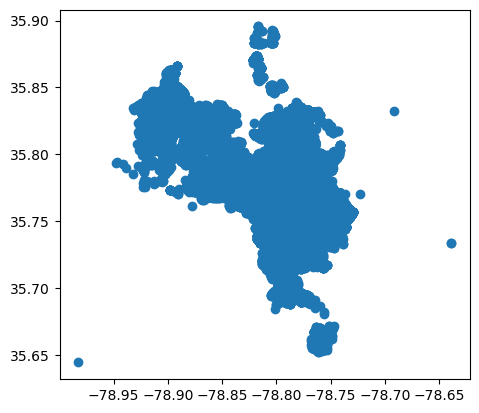

In [214]:
# Data of all the crimes listed although i just want to map Aggravated Assault ;(
cpd_trimmed.plot()

In [215]:
cpd_trimmed.geometry

0        POINT (-78.78775 35.80567)
1        POINT (-78.78404 35.80485)
2        POINT (-78.77999 35.81942)
3        POINT (-78.75274 35.77340)
4        POINT (-78.78215 35.76714)
                    ...            
49995    POINT (-78.77110 35.80239)
49996    POINT (-78.77110 35.80239)
49997    POINT (-78.77293 35.79742)
49998    POINT (-78.78232 35.79464)
49999    POINT (-78.78030 35.79191)
Name: geometry, Length: 50000, dtype: geometry

<AxesSubplot: >

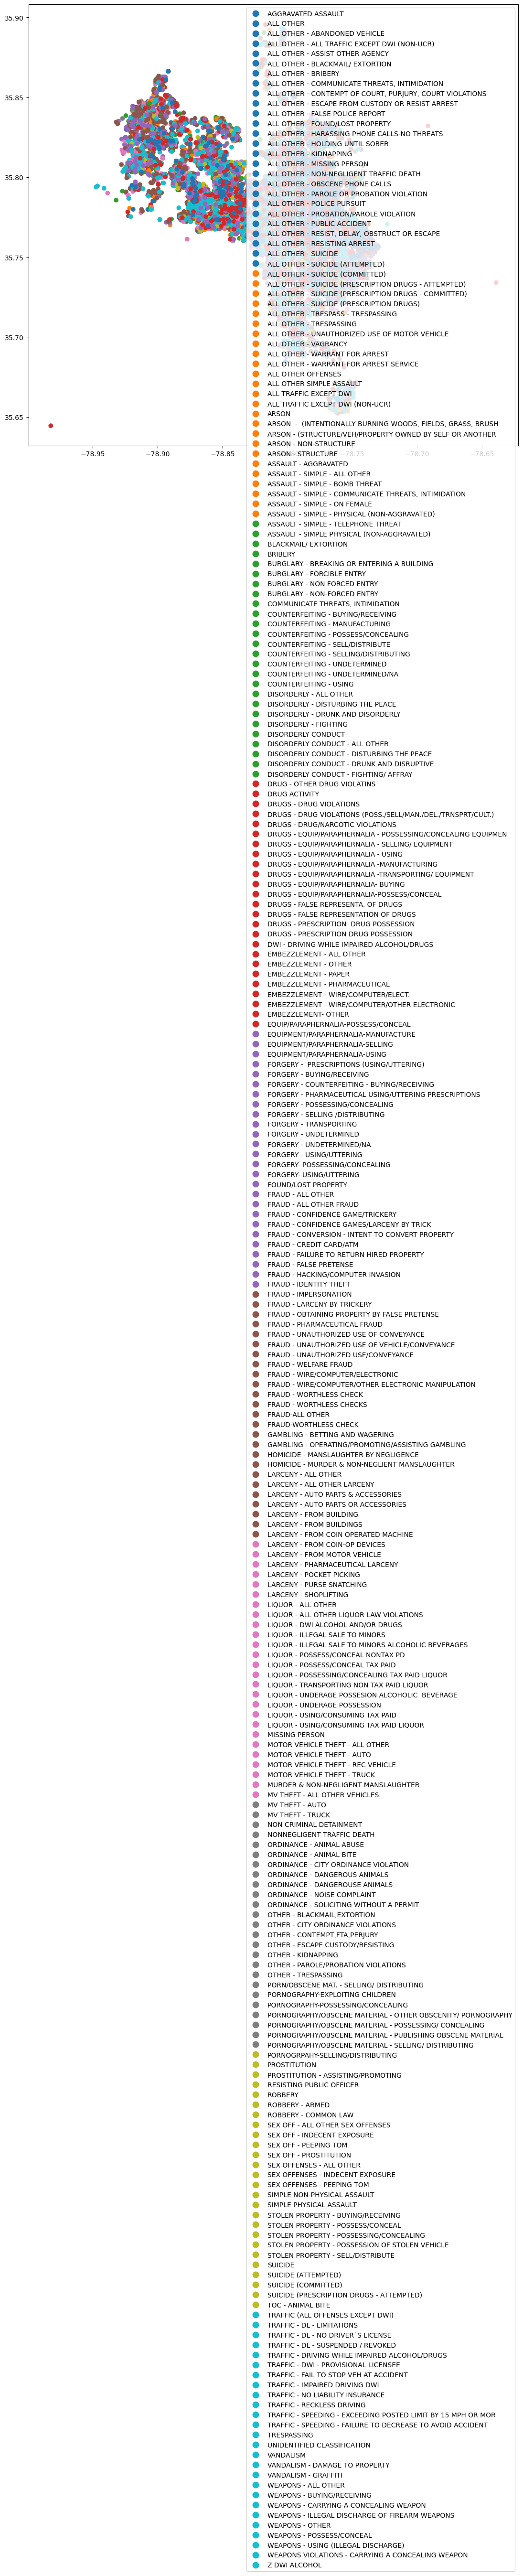

In [217]:
# wow!!! so coool although i just wanted to map one single crime variable it mapped all the crimes listed on the data set.
cpd_trimmed.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'crime_type',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

In [219]:
import folium 

In [220]:
# Gonna try to make the data interact with the map
m=folium.Map()
m

In [221]:
#average latitude
latitude=cpd_trimmed.lat.mean()
latitude

35.77823182445939

In [223]:
#average longitude
longitude=cpd_trimmed.lon.mean()
longitude

-78.79241822356832

In [225]:
# Center the map to the City of Cary 
m=folium.Map(location=[latitude,longitude])
m

In [227]:
for index, row in cpd_trimmed.iterrows():
    print(row.crime_type, row.lat, row.lon)

AGGRAVATED ASSAULT 35.80566864 -78.78774967
AGGRAVATED ASSAULT 35.804852198 -78.7840416
AGGRAVATED ASSAULT 35.819416329 -78.77999459
AGGRAVATED ASSAULT 35.773398613 -78.75273923
AGGRAVATED ASSAULT 35.767135419 -78.78215302
AGGRAVATED ASSAULT 35.764829494 -78.7834688
AGGRAVATED ASSAULT 35.764714149 -78.76513677
AGGRAVATED ASSAULT 35.766969074 -78.73934253
AGGRAVATED ASSAULT 35.764065191 -78.74339687
AGGRAVATED ASSAULT 35.767550556 -78.74098356
AGGRAVATED ASSAULT 35.761962181 -78.74903266
AGGRAVATED ASSAULT 35.764065191 -78.74339687
AGGRAVATED ASSAULT 35.761962181 -78.74903266
AGGRAVATED ASSAULT 35.764065191 -78.74339687
AGGRAVATED ASSAULT 35.764065191 -78.74339687
AGGRAVATED ASSAULT 35.765904627 -78.74271686
AGGRAVATED ASSAULT nan nan
AGGRAVATED ASSAULT nan nan
AGGRAVATED ASSAULT 35.804381635 -78.77610613
AGGRAVATED ASSAULT 35.793325797 -78.77189933
AGGRAVATED ASSAULT 35.793090146 -78.74957676
AGGRAVATED ASSAULT 35.778736326 -78.80231619
AGGRAVATED ASSAULT 35.788787561 -78.78384763
AGGR

In [236]:
for index, row in cpd_trimmed.iterrows():
    folium.Marker([row.lat,row.lon],popup=row.crime_type,tooltip=row.crime_type).add_to(m)
m

ValueError: Location values cannot contain NaNs.

In [237]:
# Looks like some of the data set containes "NANs" that does not permit me to finalize the output of this function. 
# Will need to learn how to clean that data out in order to finalize the map. I Will ask for help during discussion 

In [239]:
m.save('cpd.html')